# Cookbook de ML

## Importamos las librerias a utilizar

- pandas para cargar nuestros datos
- sklearn para realizar el ML
- matplotlib y seaborn para graficos

In [410]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

## Cargamos los datos

In [411]:
df = pd.read_csv("https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv", sep=";")

In [412]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Separamos X e y

Definimos cual es la columna a predecir y que columnas utilizaremos como predictoras.

Tambien deberiamos separar aqui en conjunto de entrenamiento y de prueba pero por simplicidad lo haremos despues del EDA.

In [413]:
X = df.drop("y", axis=1)
y = df["y"]

## EDA para Maquinas

Aqui preparamos los datos para que los algoritmos de ML puedan funcionar de la mejor manera. Si bien cada algoritmo requiere diferentes transformaciones de los datos de acuerdo a su funcionamiento en este cookbook veremos los pasos mas simples para que todos los algoritmos funcionen. Luego se debera iterar probando distintas tecnicas para obtener un mejor resultado.

### A los algoritmos de ML le gustan los vectores

Para que cada fila sea un vector no debe tener valores nulos y cada celda debe ser un numero y no un texto o fecha u otra cosa que no sea un numero. Entonces deberemos:

1. Eliminar o imputar nulos
2. Eliminar o transformar en numeros las celdas que no son numeros.
3. En algoritmos como knn, regresion y redes neuronales es bueno aplicar transformaciones de normalizacion a las columnas numericas.

#### Diferenciamos las columnas numericas de las categoricas

In [414]:
col_numericas = X.select_dtypes(include=['number']).columns.tolist()
col_categoricas = X.select_dtypes(include=['object']).columns.tolist()

print("Columnas numericas:", col_numericas)
print("Columnas categoricas:", col_categoricas)

Columnas numericas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Columnas categoricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


#### Imputamos los nulos de las columnas numericas con la media

In [415]:
X[col_numericas] = X[col_numericas].fillna(X[col_numericas].mean())

#### Transformamos las columnas categoricas a numeros e imputamos los nulos

In [416]:
X = pd.get_dummies(X, columns=col_categoricas, dtype=int)

#### Normalizamos

In [417]:
X[col_numericas] = sklearn.preprocessing.StandardScaler().fit_transform(X[col_numericas])

## Separamos los conjuntos de train y test

Esta separacion deberia hacerse al principio antes de la imputacion de nulos y la transformacion de los datos pero por simplicidad haremos esta pequeña trampa de hacerlo luego.

In [418]:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [419]:
X_train

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
25611,0.861322,-0.120663,0.517118,0.195414,-0.349494,-0.115781,-0.649003,-0.323542,0.287536,0.398115,...,0,0,0,0,0,0,1,0,1,0
26010,-0.290186,-0.217085,-0.204909,0.195414,1.671136,-0.115781,-0.649003,-0.323542,0.287536,0.398115,...,0,0,0,0,0,0,1,1,0,0
40194,3.644131,3.431535,-0.565922,0.195414,-0.349494,-1.134279,1.104525,0.043776,-1.586283,-2.428157,...,0,0,0,1,0,0,0,0,1,0
297,-0.386145,-0.533350,-0.204909,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,0,0,0,1,0,0,0,0,1,0
36344,1.820911,0.423159,-0.204909,0.195414,-0.349494,-1.898153,-1.058448,-0.064259,-1.360272,-1.257233,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40205,-1.153816,-0.255654,-0.565922,0.195414,-0.349494,-1.134279,1.104525,0.043776,-1.582824,-2.428157,...,0,0,0,0,0,1,0,0,1,0
27316,1.149199,-0.749336,-0.565922,0.195414,1.671136,-0.115781,-0.649003,-0.323542,0.230456,0.398115,...,0,0,1,0,0,0,0,1,0,0
14392,1.341116,-0.490925,0.517118,0.195414,-0.349494,0.839061,0.591424,-0.474791,0.772999,0.845170,...,0,0,0,1,0,0,0,0,1,0
7494,-1.057857,-0.359790,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.716496,0.331680,...,0,0,1,0,0,0,0,0,1,0


In [420]:
y_train

,y
25611,no
26010,no
40194,yes
297,no
36344,no
...,...
40205,no
27316,no
14392,no
7494,no


In [421]:
X_test

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
14455,-0.769980,-0.490925,0.878132,0.195414,-0.349494,0.839061,0.591424,-0.474791,0.772422,0.845170,...,0,0,0,0,0,1,0,0,1,0
36380,-0.290186,-0.610488,-0.565922,0.195414,-0.349494,-1.898153,-1.058448,-0.064259,-1.360272,-1.257233,...,0,0,0,0,0,1,0,0,1,0
40076,3.164336,-0.490925,-0.204909,0.195414,-0.349494,-1.134279,1.104525,0.043776,-1.620876,-2.428157,...,0,0,0,0,1,0,0,0,1,0
10778,0.381527,-0.811047,-0.204909,0.195414,-0.349494,0.839061,1.536429,-0.280328,0.772422,0.845170,...,0,0,0,0,0,1,0,0,1,0
27939,-1.153816,-0.440785,-0.204909,0.195414,-0.349494,-1.197935,-1.265761,-2.052098,-1.205177,-0.940281,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33359,0.765363,1.800069,-0.565922,0.195414,-0.349494,-1.197935,-1.179380,-1.231034,-1.343551,-0.940281,...,0,0,0,0,0,1,0,0,1,0
34998,-0.961898,-0.382932,-0.565922,0.195414,-0.349494,-1.197935,-1.179380,-1.231034,-1.367190,-0.940281,...,0,0,1,0,0,0,0,0,1,0
39861,-0.674021,0.824276,-0.565922,0.195414,1.671136,-1.134279,0.828107,0.151810,-1.672767,-2.428157,...,0,0,0,1,0,0,0,1,0,0
3920,0.381527,1.580227,1.600159,0.195414,-0.349494,0.648092,0.722722,0.886447,0.713036,0.331680,...,0,0,0,1,0,0,0,0,1,0


In [422]:
y_test

,y
14455,no
36380,no
40076,no
10778,no
27939,no
...,...
33359,yes
34998,no
39861,no
3920,no


## Importar los Algoritmos de ML que vayamos a probar o utilizar

Si la columna a predecir es *CATEGORICA* debemos utilizar un algoritmo de clasificacion:

Ejemplos:
```python
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier
```

Si la columna a predecir es *NUMERICA* debemos utilizar un algoritmo de regresion.

Ejemplos:
```python
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
```

In [423]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

## Probar distintos Algoritmos de ML que queremos utilizar y seleccionar el que consideramos mejor

> Pero como seleccionar el mejor si solo podemos utilizar el conjunto de prueba (X_test) solo al final?

Debemos volver a separar el conjunto de entrenamiento en entrenamiento (X_train) y *validacion* (X_val)

In [424]:
X_train,X_val,y_train,y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

## Entrenamiento de la caja negra

Aqui creamos las cajas negras predictoras utilizando los algoritmos de ML elegidos y los datos de entrenamiento

In [425]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
hg = HistGradientBoostingClassifier()

### Entrenamos

In [426]:
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
hg.fit(X_train, y_train);

### Probamos los datos en el test de validacion y seleccionamos el mejor

In [427]:
predicciones_val = knn.predict(X_val)
accuracy = sklearn.metrics.accuracy_score(y_val, predicciones_val)
print("Accuracy total KNN:", accuracy)
matrix = sklearn.metrics.confusion_matrix(y_val, predicciones_val)
print("Accuracy por clase:", matrix.diagonal()/matrix.sum(axis=1))
predicciones_val = dt.predict(X_val)
accuracy = sklearn.metrics.accuracy_score(y_val, predicciones_val)
print("Accuracy Arbol:", accuracy)
matrix = sklearn.metrics.confusion_matrix(y_val, predicciones_val)
print("Accuracy por clase:", matrix.diagonal()/matrix.sum(axis=1))
predicciones_val = lr.predict(X_val)
accuracy = sklearn.metrics.accuracy_score(y_val, predicciones_val)
print("Accuracy Regresion Logistica:", accuracy)
matrix = sklearn.metrics.confusion_matrix(y_val, predicciones_val)
print("Accuracy por clase:", matrix.diagonal()/matrix.sum(axis=1))
predicciones_val = hg.predict(X_val)
accuracy = sklearn.metrics.accuracy_score(y_val, predicciones_val)
print("Accuracy HistGradientBoosting:", accuracy)
matrix = sklearn.metrics.confusion_matrix(y_val, predicciones_val)
print("Accuracy por clase:", matrix.diagonal()/matrix.sum(axis=1))

Accuracy total KNN: 0.8937784522003035
Accuracy por clase: [0.95998632 0.37196765]
Accuracy Arbol: 0.8849772382397572
Accuracy por clase: [0.93519152 0.48921833]
Accuracy Regresion Logistica: 0.907587253414264
Accuracy por clase: [0.97093023 0.4083558 ]
Accuracy HistGradientBoosting: 0.9163884673748103
Accuracy por clase: [0.96477428 0.53504043]


## Seleccionando el modelo ganador

Que modelo o caja predictora conviene seleccionar?

Si lo unico que nos interesa es una metrica especifica entoncese seleccionaremos el que mejor resultado tiene en esa metrica.

Hay veces que no solo importa que tan precisa es la prediccion sino que queremos entender que es lo que esta haciendo la caja negra. En el caso de los modelos simples como knn, arboles de desicion o regresion lineal entendemos perfectamente lo que hace el modelo, no es una caja negra. En cambio los modelos de ensemble y boosting son realmente una caja negra por su gran complejidad.

Otras veces podemos priorizar la velocidad de entrenamiento y de prediccion o el tamaño en disco de los modelos generados.

Por lo tanto la seleccion del modelo dependera de los objetivos de nuestro sistema y no solo de precision de prediccion.

## Utilizando la caja negra predictora seleccionada y creando reporte final con el conjunto de prueba (X_test,y_test)

Las metricas que obtengamos de este resultado seran las que comuniquemos en nuestro reporte final para decir que tan bien funciona el modelo predictivo que hemos seleccionado

In [428]:
predicciones = hg.predict(X_test)

## Comprobando que tan buenas son las predicciones

In [429]:
pred_vs_real = pd.DataFrame()
pred_vs_real["y_test"] = y_test
pred_vs_real["predicciones"] = predicciones
pred_vs_real

,y_test,predicciones
14455,no,no
36380,no,no
40076,no,no
10778,no,no
27939,no,no
...,...,...
33359,yes,yes
34998,no,no
39861,no,yes
3920,no,no


In [430]:
accuracy = sklearn.metrics.accuracy_score(y_test, predicciones)
print("Accuracy:", accuracy)

Accuracy: 0.9208545763534839


In [431]:
matrix = sklearn.metrics.confusion_matrix(y_test, predicciones)
print("Accuracy por clase:", matrix.diagonal()/matrix.sum(axis=1))

Accuracy por clase: [0.96730506 0.5549569 ]


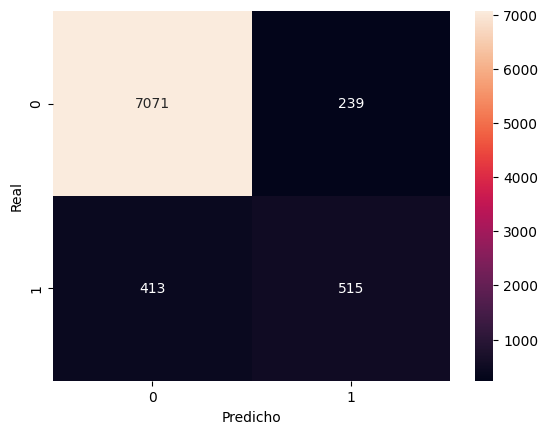

In [432]:
confussion_matrix = sklearn.metrics.confusion_matrix(y_test, predicciones)
sns.heatmap(confussion_matrix, annot=True, fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Real');

In [433]:
report = sklearn.metrics.classification_report(y_test, predicciones)
print(report)

              precision    recall  f1-score   support

          no       0.94      0.97      0.96      7310
         yes       0.68      0.55      0.61       928

    accuracy                           0.92      8238
   macro avg       0.81      0.76      0.78      8238
weighted avg       0.92      0.92      0.92      8238



# Este resultado es bueno o es malo?

Como saber si mi prediccion es buena o mala?

- 90% de Accuracy (u otra metrica) es bueno?
- 30% de Accuracy (u otra metrica) es malo?

Todo es relativo, cual es el accuracy actual en el negocio? Que se utiliza actualmente para hacer la prediccion? Podemos comparar contra eso? Lo mejoramos o no?

Lo mas recomendado es establecer una base, si el negocio ya la tiene podemos empezar por alli si no podemos utilizar la media o la moda como predictor base dependiendo si la variable a predecir es numerica o categorica respectivamente.

## Ejemplo de la moda como predictor base

Aqui utilizaremos los predictores Dummy de sklearn que nos permiten exactamente eso tener una base contra la cual comparar nuestros resultados

In [434]:
predictor_base = sklearn.dummy.DummyClassifier(strategy='most_frequent')
predictor_base.fit(X_train, y_train);

In [435]:
predicciones_base = predictor_base.predict(X_test)

In [436]:
accuracy_base = sklearn.metrics.accuracy_score(y_test, predicciones_base)
print("Accuracy base:", accuracy_base)

Accuracy base: 0.8873512988589464


In [437]:
matrix = sklearn.metrics.confusion_matrix(y_test, predicciones_base)
print("Accuracy por clase:", matrix.diagonal()/matrix.sum(axis=1))

Accuracy por clase: [1. 0.]


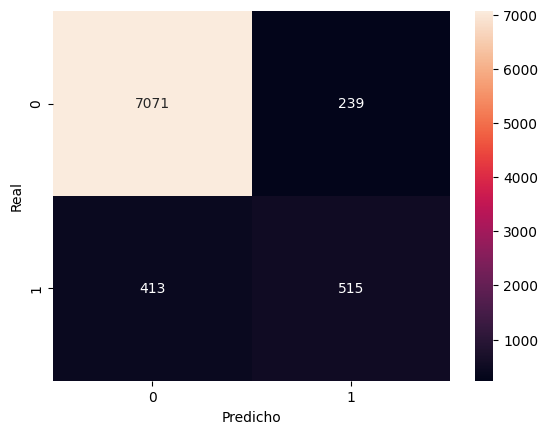

In [438]:
confussion_matrix = sklearn.metrics.confusion_matrix(y_test, predicciones)
sns.heatmap(confussion_matrix, annot=True, fmt='g')
plt.xlabel('Predicho')
plt.ylabel('Real');

In [439]:
report = sklearn.metrics.classification_report(y_test, predicciones_base)
print(report)

              precision    recall  f1-score   support

          no       0.89      1.00      0.94      7310
         yes       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
